In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [ ]:
def initial_condition(I0):
    G=nx.read_gpickle('Graph.gpickle')
    for n_0 in G.nodes:
        G.nodes[n_0]['x']=['s']
        G.nodes[n_0]['t']=[0]
        if random.random()<I0:
            G.nodes[n_0]['x']=['i']
    return G

In [ ]:
def Count_nodes(Graph):
    enode=[]
    inode=[]

    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']==['e']:
            enode.append(n_1)  
        if Graph.nodes[n_1]['x']==['i']:
            inode.append(n_1)  

    return (inode,enode)

In [ ]:
def SEIR_dynamic(I0,beta,gamma,t_e):

    G = initial_condition(I0)

    for dp in range(80):

        (inode,enode)= Count_nodes(Graph=G)

        for n_2 in G.nodes:
            if G.nodes[n_2]['x']==['e']:
                G.nodes[n_2]['t'][0]+=1

        for n_3 in range(len(enode)):
            if G.nodes[enode[n_3]]['t']>=np.random.poisson(t_e,size=1)[0]:
                G.nodes[enode[n_3]]['x']=['i']

        for n_6 in range(len(inode)):
            if random.random()<gamma:
                G.nodes[inode[n_6]]['x']=['r']
            for n_7 in range(len(list(G.adj[inode[n_6]]))):
                if ((G.nodes[list(G.adj[inode[n_6]])[n_7]]['x']==['s']) and (random.random()<beta)):
                    G.nodes[list(G.adj[inode[n_6]])[n_7]]['x']=['e']

    rnum=0
    for i in G.nodes:
        if G.nodes[i]['x']==['r']:
            rnum+=1
    return rnum

In [ ]:
rdata=np.zeros((100,100))
rmean=np.zeros(100)
beta_list=np.linspace(0,1,100)
m=0
for beta in beta_list:
    for i in range(100):
        rdata[m][i]=SEIR_dynamic(I0= 0.01,beta= beta,gamma= 1,t_e= 5)
    rmean[m]=np.mean(rdata[m])
    m+=1
    pps(m,100)

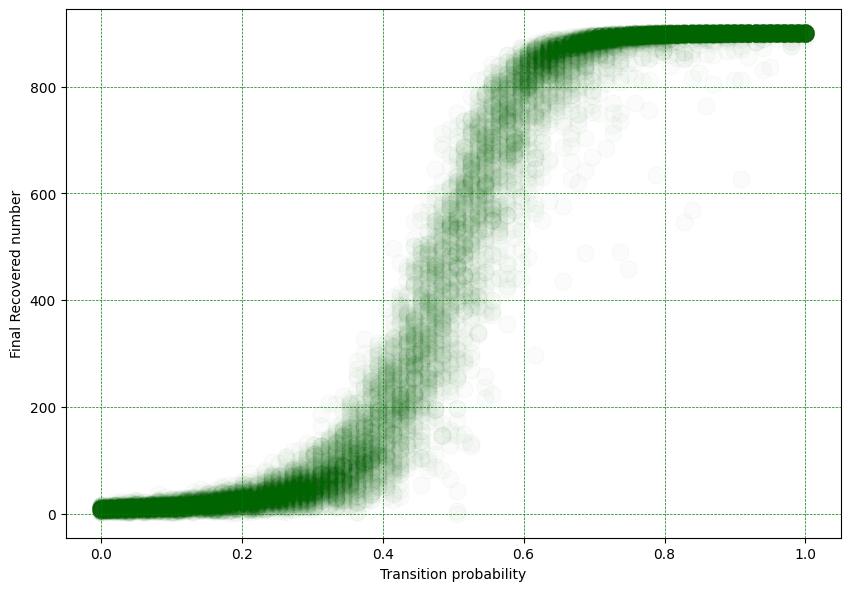

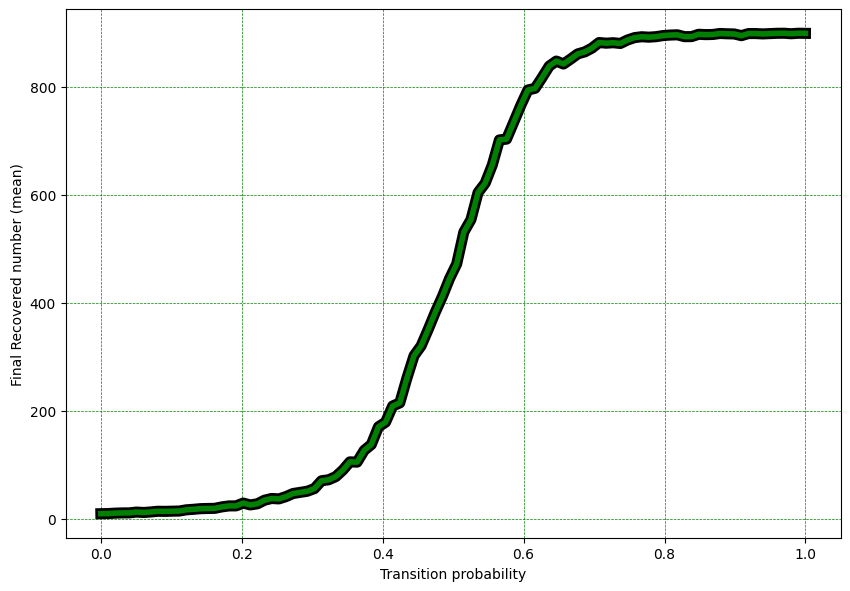

In [145]:
plt.figure(figsize=(10,7),dpi=100)
plt.grid(color = 'g', linestyle = '--', linewidth = 0.5)
for i in range(100):
    plt.scatter(np.full(100,beta_list[i]),rdata[i],s=150,c='darkgreen',alpha=0.02)
plt.xlabel('Transition probability')
plt.ylabel('Final Recovered number')
plt.savefig('fig0')
plt.show()
plt.figure(figsize=(10,7),dpi=100)
plt.grid(color = 'g', linestyle = '--', linewidth = 0.5)
plt.xlabel('Transition probability')
plt.ylabel('Final Recovered number (mean)')
plt.plot(beta_list,rmean,'k',lw=8)
plt.plot(beta_list,rmean,'g',lw=4)
plt.savefig('fig0m')
plt.show()